### 1. Setup

#### 1.1. Import required modules


In [16]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# data preprocessing
from sklearn.preprocessing import StandardScaler

# model tuning
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV

# model scoring
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import numpy as np  # linear algebra
import pandas as pd  # data analysis

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# decorations
%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("Set2")


#### 1.2. Load the dataset


In [17]:
train_data = pd.read_csv("./input/train.csv")
test_data = pd.read_csv("./input/test.csv")

print("train data:")
display(train_data.head(3))

print("test data:")
display(test_data.head(3))


train data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


test data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


#### 1.3. Describing the data


In [18]:
print("train data features  :")
print(train_data.dtypes)
print("test data features   :", test_data.columns.values)
print("total no. of features:", len(train_data.columns.values))


train data features  :
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
test data features   : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
total no. of features: 12


Features discovering results:

- Features of the test data and the training data are exactly the same except for the 'Survived' feature (because it's the target).
- Features types:
  1.  **Numerical**:
      1.  **Discrete** (numeric variables that have a countable number of values between any two values):
          1.  _SibSp_ - Number of siblings/spouses of the passenger that are on-board.
          2.  _Parch_ - Number of parents/children that are on-board.
      2.  **Continuous** (numeric variables that have an infinite number of values between any two values):
          1.  _Age_ - Age of the passenger.
          2.  _Fare_ - Price paid by the passenger.
  2.  **Categorical**:
      1.  **Nominal** (the data can only be categorized):
          1. _Sex_ - Gender of the passenger (male/female).
          2. _Embarked_ - Port the passenger embarked from (C = Cherbourg, Q = Queenstown, S = Southampton).
          3. _Survived_ (Target Variable) - If the passenger survived or not.
      2.  **Ordinal** (the data can be categorized and ranked):
          1. _Pclass_ - Passenger's status (1st = Upper, 2nd = Middle, 3rd = Lower).
  3.  **Text**:
      1. _Ticket_ - Ticket number.
      2. _Name_ - Name of the passenger.
      3. _Cabin_ - The cabin number of the passenger.
  4.  **ID**:
      1.  _PassengerId_ - Passenger identifier.


### 2. Exploratory Data Analysis (EDA)


#### 2.1. Visualize numerical data distribution


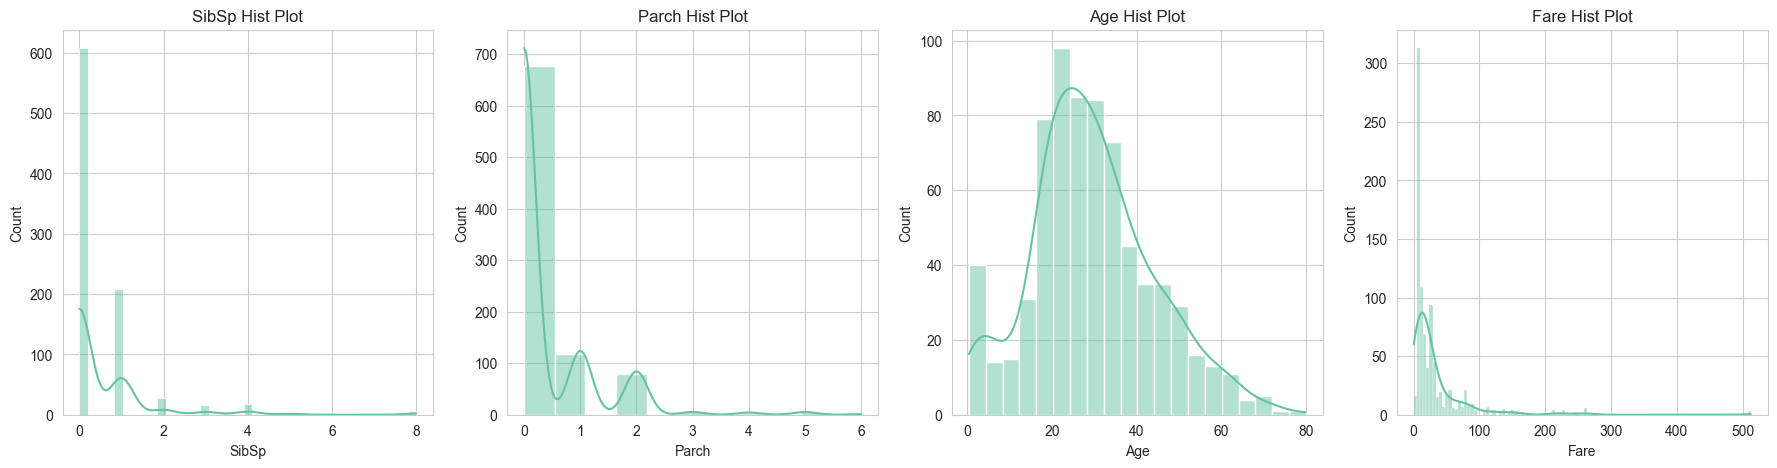

,SibSp,Parch,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.523008,0.381594,29.699118,32.204208
std,1.102743,0.806057,14.526497,49.693429
min,0.000000,0.000000,0.420000,0.000000
25%,0.000000,0.000000,20.125000,7.910400
50%,0.000000,0.000000,28.000000,14.454200
75%,1.000000,0.000000,38.000000,31.000000
max,8.000000,6.000000,80.000000,512.329200


In [19]:
def numerical_dist(data, vars):
    fig, axis = plt.subplots(nrows=1, ncols=len(vars), figsize=(22, 5))
    for idx, var in enumerate(vars):
        sns.histplot(data=data, x=var, kde=True, ax=axis[idx])
        axis[idx].set_title(var + " Hist Plot")
    plt.show()


numeric_vars = ["SibSp", "Parch", "Age", "Fare"]
numerical_dist(train_data, numeric_vars)
train_data[numeric_vars].describe()


#### 2.2. Visualize categorical data distribution

Here the target variable i.e. _Survived_ is also plotted along with other categorical variables.


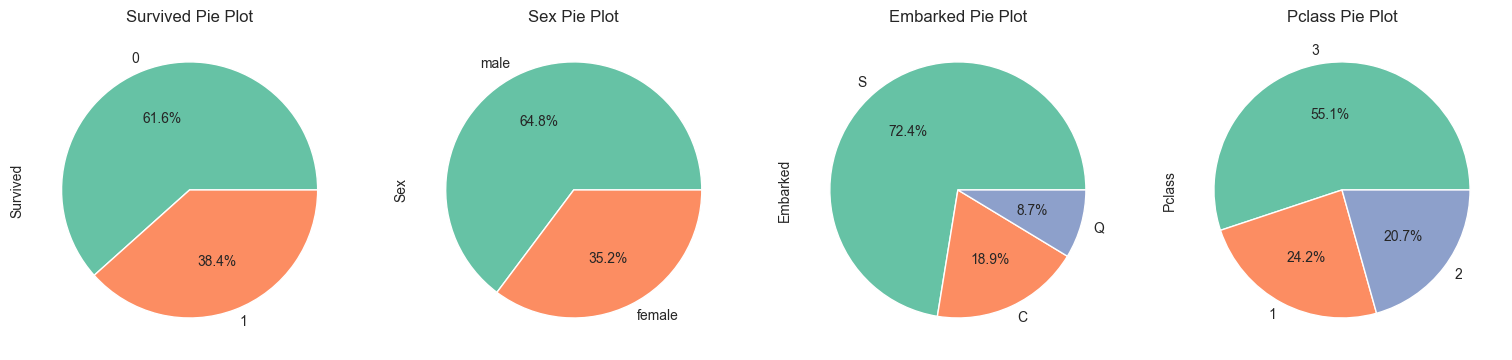

In [20]:
def categorical_dist(data, vars):
    fig, axis = plt.subplots(nrows=1, ncols=len(vars), figsize=(19, 5))
    for idx, var in enumerate(vars):
        data[var].value_counts().plot(
            kind="pie", autopct='%1.1f%%', ax=axis[idx])
        axis[idx].set_title(var + " Pie Plot")
    plt.show()


target = ["Survived"]
categorical_vars = ["Sex", "Embarked", "Pclass"]
categorical_dist(train_data, target + categorical_vars)


#### 2.3. Visualize correlation between features and target


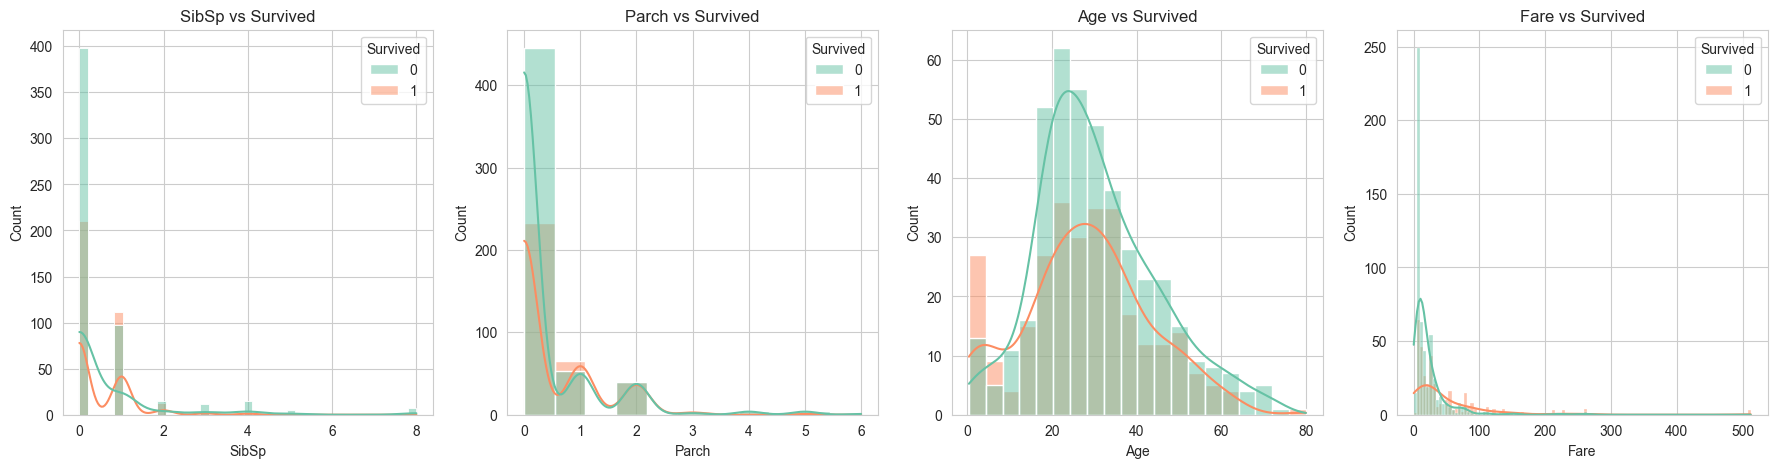

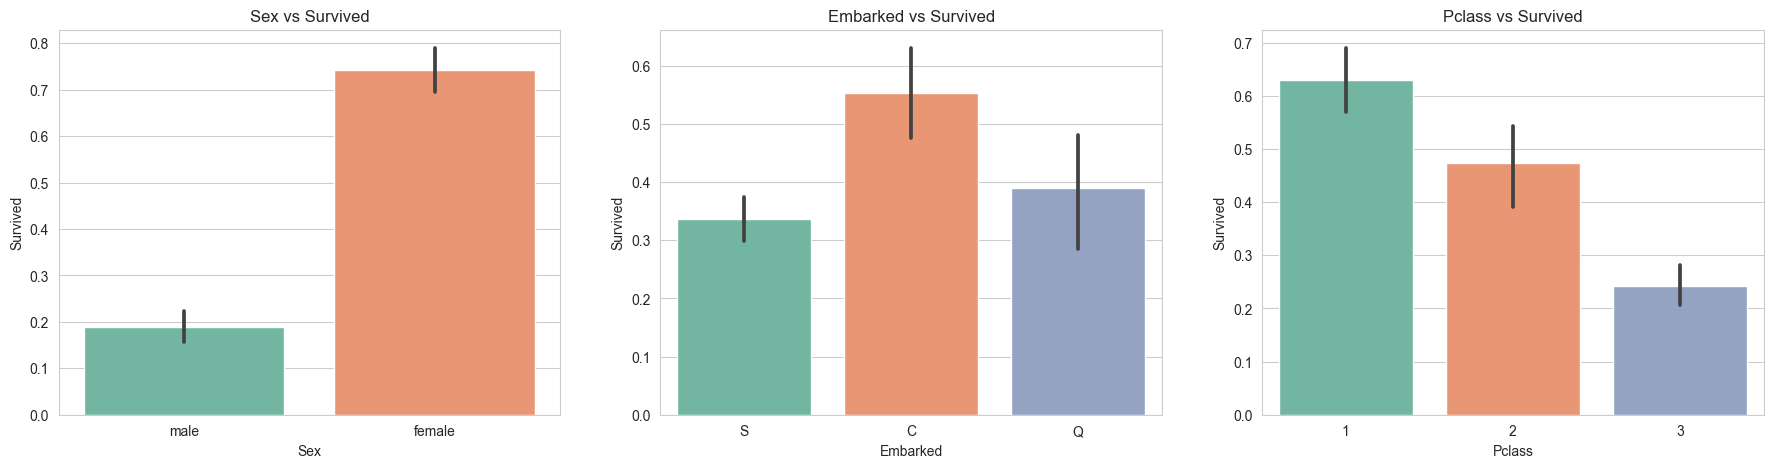

In [21]:
def target_correlation_dist(data, num_vars, cat_vars):
    # numerical features vs target
    fig, ax = plt.subplots(1, len(num_vars),  figsize=(22, 5))
    ax = ax.flatten()
    for idx, var in enumerate(num_vars):
        sns.histplot(data=train_data, x=var, kde=True,
                     hue="Survived", ax=ax[idx])
        ax[idx].set_title(var+" vs Survived")
    # categorical features vs target
    fig, ax = plt.subplots(1, len(cat_vars),  figsize=(22, 5))
    ax = ax.flatten()
    for idx, var in enumerate(cat_vars):
        sns.barplot(data=train_data, x=var, y="Survived", ax=ax[idx])
        ax[idx].set_title(var+" vs Survived")
    plt.show()


target_correlation_dist(train_data, numeric_vars, categorical_vars)


- Observations:
  1. Passengers who travel with small numbers of family have a greater survival chance.
  2. Large number of children (Age <= 10) survived, while passengers with the age above them tend not to survive.
  3. Number of female who survived was much more than male.
  4. Passengers embarked from Port C has more chances of survival than other ports.
  5. Class 1 managed to survive or have more priority to be saved, while passengers with class 3 tend not to survive.

### 3. Feature Engineering

#### 3.1. Correction and encoding of features


In [22]:
# drop unrelated features
train_data.drop(columns=['PassengerId', 'Name',
                'Ticket', 'Cabin'], axis=1, inplace=True)
passengerIds = test_data['PassengerId']
test_data.drop(columns=['PassengerId', 'Name',
               'Ticket', 'Cabin'], axis=1, inplace=True)


In [23]:
# fill NaN values for numerical features
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

train_data['Fare'] = train_data['Fare'].fillna(0)  # improve corrections here
test_data['Fare'] = test_data['Fare'].fillna(0)

# encode categorical features
train_data_encoded = pd.get_dummies(train_data, columns=categorical_vars)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_vars)
display(train_data_encoded.head(3))

# check if any features has NaN values
train_data_encoded.isna().sum()


,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1


Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

#### 3.2. Visualize encoded dataset correlation


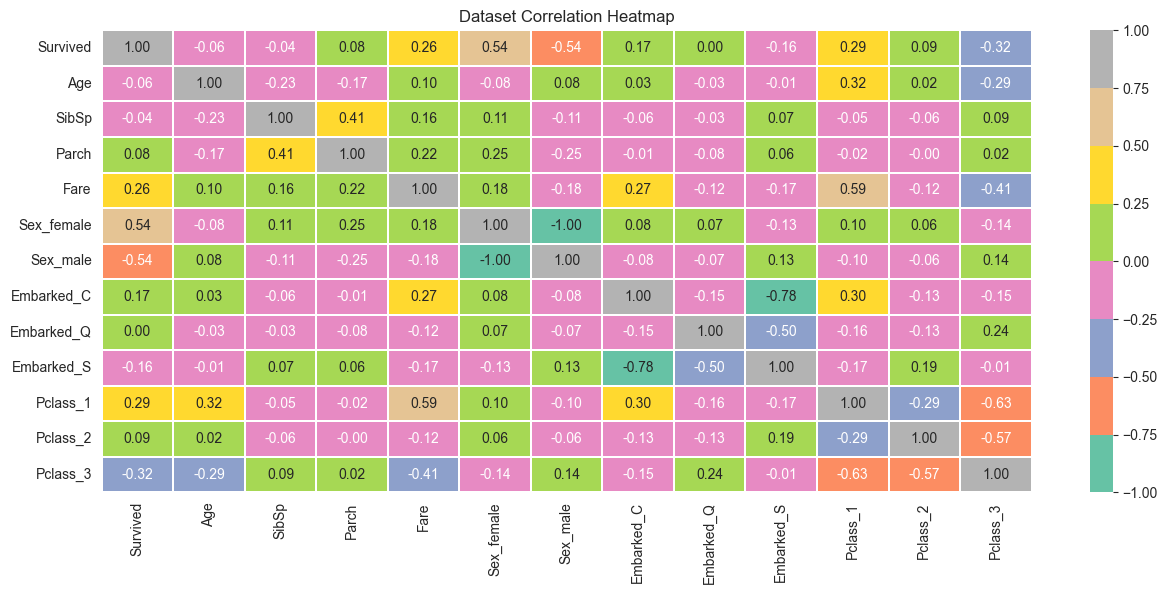

In [24]:
fig, ax = plt.subplots(figsize=[15, 6])
sns.heatmap(train_data_encoded.corr(), ax=ax,  annot=True,
            linewidths=0.05, fmt='.2f', cmap="Set2")
ax.set_title("Dataset Correlation Heatmap")
plt.show()


### 4. Model Building

#### 4.1. Splitting the dataset and scaling


In [25]:
# training data
X_train = train_data_encoded.drop("Survived", axis=1)
y_train = train_data_encoded["Survived"]

# testing data
X_test = test_data_encoded
y_test = pd.read_csv("./input/gender_submission.csv")["Survived"]

# scaling datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


#### 4.2. Identifying the best classifying model


In [26]:
classifiers = {
    "LR": LogisticRegression(max_iter=1000),
    "DT": DecisionTreeClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier()
}

results = pd.DataFrame(
    columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])

# cross validate all the models
kfold = StratifiedKFold(n_splits=10)
for name, model in classifiers.items():
    cv_results = cross_validate(
        model, X_train, y_train, cv=kfold, scoring=(['accuracy', 'f1']))
    result = pd.DataFrame({
        "Classifier": name,
        "Avg_Accuracy": cv_results["test_accuracy"].mean(),
        "Avg_F1_Score": cv_results["test_f1"].mean(),
    }, index=[name])
    results = pd.concat([results, result], ignore_index=True)

# calculate average overall score
results["Avg_Overall"] = (
    results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
display(results)


,Classifier,Avg_Accuracy,Avg_F1_Score,Avg_Overall
2,SVC,0.827154,0.735798,0.781476
4,RF,0.812672,0.748464,0.780568
3,KNN,0.802509,0.727570,0.765040
0,LR,0.799126,0.725533,0.762330
1,DT,0.795793,0.726665,0.761229


**Cross Validation** - A good model is not the one that gives accurate predictions on the known data or training data but the one which gives good predictions on the new data and avoids overfitting and underfitting.
Overfitting occurs when the model or the algorithm fits the data too well.
Underfitting occurs when the model or the algorithm does not fit the data well enough.

To address this, we can split our initial dataset into separate training and test subsets. There are different types of Cross Validation Techniques but the overall concept remains the same,

• To partition the data into a number of subsets

• Hold out a set at a time and train the model on remaining set

• Test model on hold out set

Repeat the process for each subset of the dataset

![cross-validate](https://miro.medium.com/max/1354/1*qPMFLEbvc8QQf38Cf77wQg.png)

#### 4.3. Hyperparameter tuning

The majority of machine learning models contain parameters that can be adjusted to vary how the model learns. For example, the logistic regression model, from sklearn, has a parameter C that controls regularization,which affects the complexity of the model.

How do we pick the best value for C? The best value is dependent on the data used to train the model.

One method is to try out different values and then pick the value that gives the best score. This technique is known as a grid search. If we had to select the values for two or more parameters, we would evaluate all combinations of the sets of values thus forming a grid of values.

In [27]:
svc = SVC()
params = {'C': [0.1, 1, 10, 100, 1000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf']}
model = GridSearchCV(svc, params, cv=kfold)
model.fit(X_train, y_train)
print("best hyper-parameters :", model.best_params_)


best hyper-parameters : {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [28]:
# predict on test data
y_pred = model.predict(X_test)
print("accuracy score :", accuracy_score(y_test, y_pred))
print("f1 score       :", f1_score(y_test, y_pred))


accuracy score : 0.8827751196172249
f1 score       : 0.8205128205128205


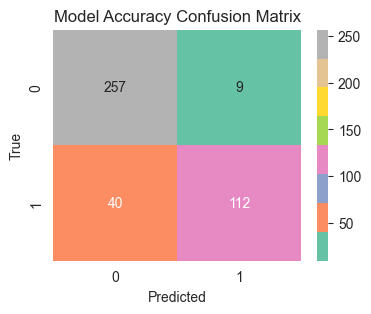

In [29]:
# prediction confusion matrix heatmap
fig, ax = plt.subplots(figsize=[4, 3])
hm = sns.heatmap(confusion_matrix(y_test, y_pred),
            fmt='.3g', annot=True, cmap="Set2")
hm.set(xlabel='Predicted', ylabel='True')
ax.set_title("Model Accuracy Confusion Matrix")
plt.show()


#### 4.4. Compile prediction results for submission


In [30]:
submission = pd.DataFrame({
    "PassengerId": passengerIds,
    "Survived": y_pred
})
display(submission.head(3))
submission.to_csv("results.csv", index=False)

# kaggle score: 0.782


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
